<h2> Importing Libraries :

---



In [401]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

<h2> Dataset :

---



In [402]:
data = pd.read_csv('/content/osteoporosis.csv')

In [403]:
data.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [404]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [405]:
data.describe()

,Id,Age,Osteoporosis
count,1958.000000,1958.000000,1958.000000
mean,105515.320735,39.101124,0.500000
std,2589.407806,21.355424,0.500128
min,101008.000000,18.000000,0.000000
25%,103348.500000,21.000000,0.000000
50%,105469.000000,32.000000,0.500000
75%,107755.000000,53.000000,1.000000
max,109996.000000,90.000000,1.000000


In [406]:
data.isnull().sum()

,0
Id,0
Age,0
Gender,0
Hormonal Changes,0
Family History,0
Race/Ethnicity,0
Body Weight,0
Calcium Intake,0
Vitamin D Intake,0
Physical Activity,0


<h2> Removing Unwanted Columns :

---



In [407]:
del data['Id']

<h2> EDA And Data Exploration :

---



<h5> 1. Age Distribution

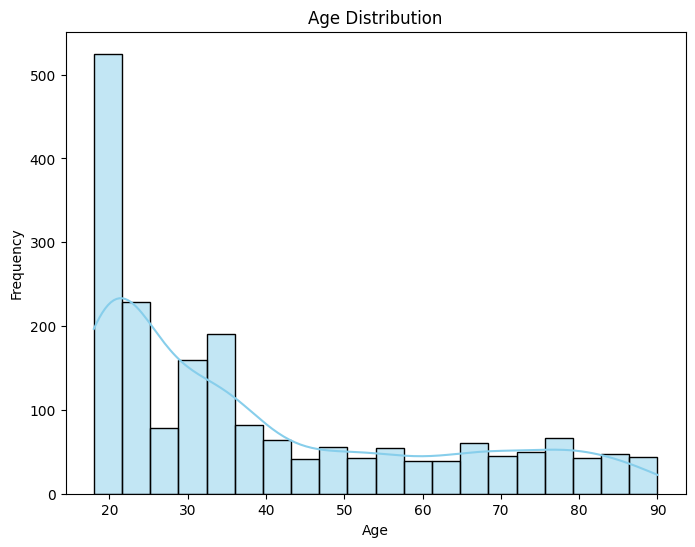

In [408]:
plt.figure(figsize = (8 , 6))
sns.histplot(data['Age'] , bins = 20 , kde = True , color = 'skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<h5> 2. Result Distribution

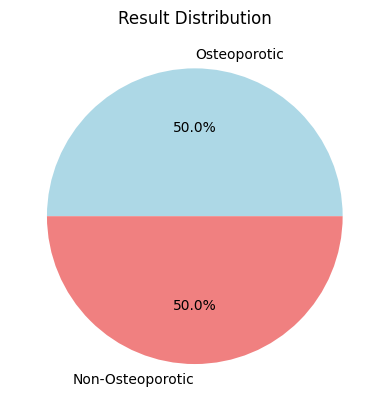

In [409]:
colors = ['lightblue', 'lightcoral']
Result = data['Osteoporosis'].value_counts(normalize = 2)
Result = Result.rename(index = {0 : 'Non-Osteoporotic' , 1 : 'Osteoporotic'})
plt.pie( Result , labels = Result.index , autopct = '%1.1f%%', colors=colors )
plt.title('Result Distribution')
plt.show()

<h5> 3. Gender Distribution

<ipython-input-410-983674f6967e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = data , x = 'Gender', palette = 'muted' )


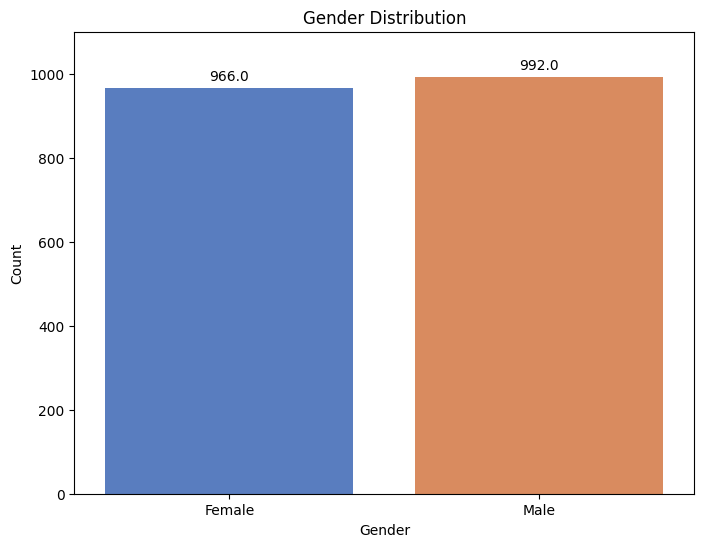

In [410]:
plt.figure(figsize = (8 , 6))
ax = sns.countplot(data = data , x = 'Gender', palette = 'muted' )
for p in ax.patches:
    ax.annotate(f'{p.get_height()}' , (p.get_x() + p.get_width() / 2, p.get_height() + 10),
                ha = 'center' , va = 'bottom' , fontsize = 10 )
ax.set_ylim(0 , 1100)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<h5> 4. Distribution of Hormonal Changes and Race/Ethnicity

<ipython-input-411-1b294ba112f9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x = 'Hormonal Changes' , order = Hormonal_Changes , palette = 'Set2' , ax = axes[0])
<ipython-input-411-1b294ba112f9>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data , x = 'Race/Ethnicity', order = Race_Ethnicity , palette = 'Set2' , ax = axes[1])


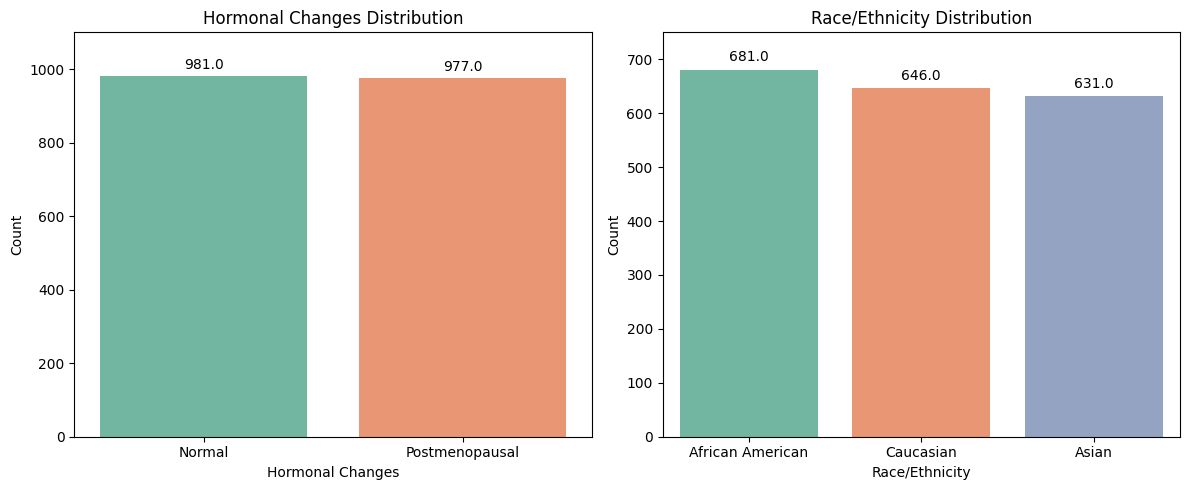

In [411]:
Hormonal_Changes = data['Hormonal Changes'].value_counts().index.tolist()
Race_Ethnicity = data['Race/Ethnicity'].value_counts().index.tolist()

fig, axes = plt.subplots(nrows = 1 , ncols = 2 , figsize = (12 , 5))

sns.countplot(data = data, x = 'Hormonal Changes' , order = Hormonal_Changes , palette = 'Set2' , ax = axes[0])
axes[0].set_title('Hormonal Changes Distribution')
axes[0].set_xlabel('Hormonal Changes')
axes[0].set_ylabel('Count')
axes[0].set_ylim(0 , 1100)

for container in axes[0].containers:
    for p in container:
        axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height() + 10),
                         ha = 'center', va = 'bottom' , fontsize = 10 )

sns.countplot(data = data , x = 'Race/Ethnicity', order = Race_Ethnicity , palette = 'Set2' , ax = axes[1])
axes[1].set_title('Race/Ethnicity Distribution')
axes[1].set_xlabel('Race/Ethnicity')
axes[1].set_ylabel('Count')
axes[1].set_ylim(0, 750)

for container in axes[1].containers:
    for p in container:
        axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height() + 10),
                         ha = 'center', va = 'bottom', fontsize = 10 )

plt.tight_layout()
plt.show()

<h5> 5. Distribution of Osteoprosis by Age

<ipython-input-412-3dd981cc6eaa>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.Age[(data['Osteoporosis'] == 0) ] , color = "Red" , shade = True)
<ipython-input-412-3dd981cc6eaa>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.Age[(data['Osteoporosis'] == 1) ] , ax = ax , color = "Blue" , shade= True)


Text(0.5, 1.0, 'Distribution of Osteoprosis by Age')

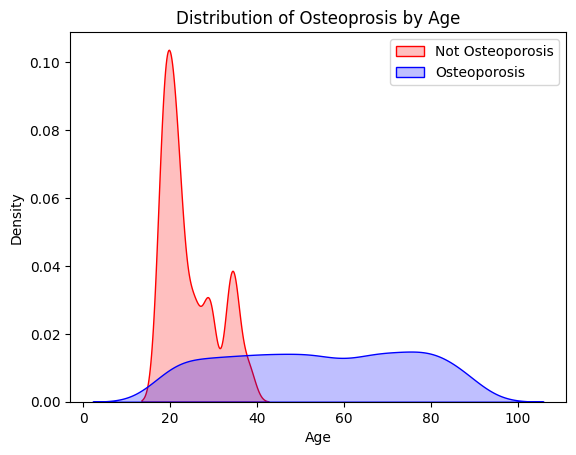

In [412]:
ax = sns.kdeplot(data.Age[(data['Osteoporosis'] == 0) ] , color = "Red" , shade = True)
ax = sns.kdeplot(data.Age[(data['Osteoporosis'] == 1) ] , ax = ax , color = "Blue" , shade= True)
ax.legend(["Not Osteoporosis","Osteoporosis"] , loc = 'upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Age')
ax.set_title('Distribution of Osteoprosis by Age')

<h5> 6. Distribution Of Family History / Smoking / Prior Fractures

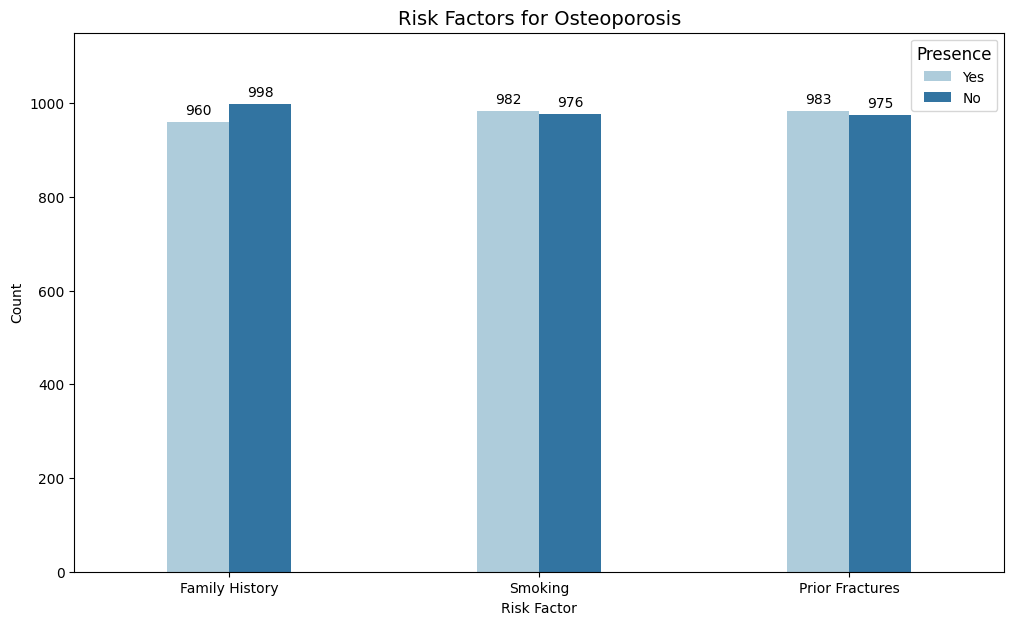

In [413]:
Risk_Factors = data[['Family History', 'Smoking', 'Prior Fractures']].melt(var_name = 'Risk Factors', value_name = 'Presence')
Risk_Factors.replace({1: 'Yes' , 0: 'No'}, inplace = True)

plt.figure(figsize=(12,7))

ax = sns.countplot(data=Risk_Factors, x='Risk Factors', hue = 'Presence', palette='Paired' , width = 0.4)

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height() + 10),
                    ha='center', va='bottom', fontsize=10)
    ax.set_ylim(0 , 1150)

plt.title('Risk Factors for Osteoporosis', fontsize=14)
plt.legend(title='Presence', loc='upper right', fontsize=10, title_fontsize=12)
plt.xlabel('Risk Factor')
plt.ylabel('Count')
plt.show()

<h5> 7. Osteoporosis by Alcohol Consumption , Medical Condition And Medications

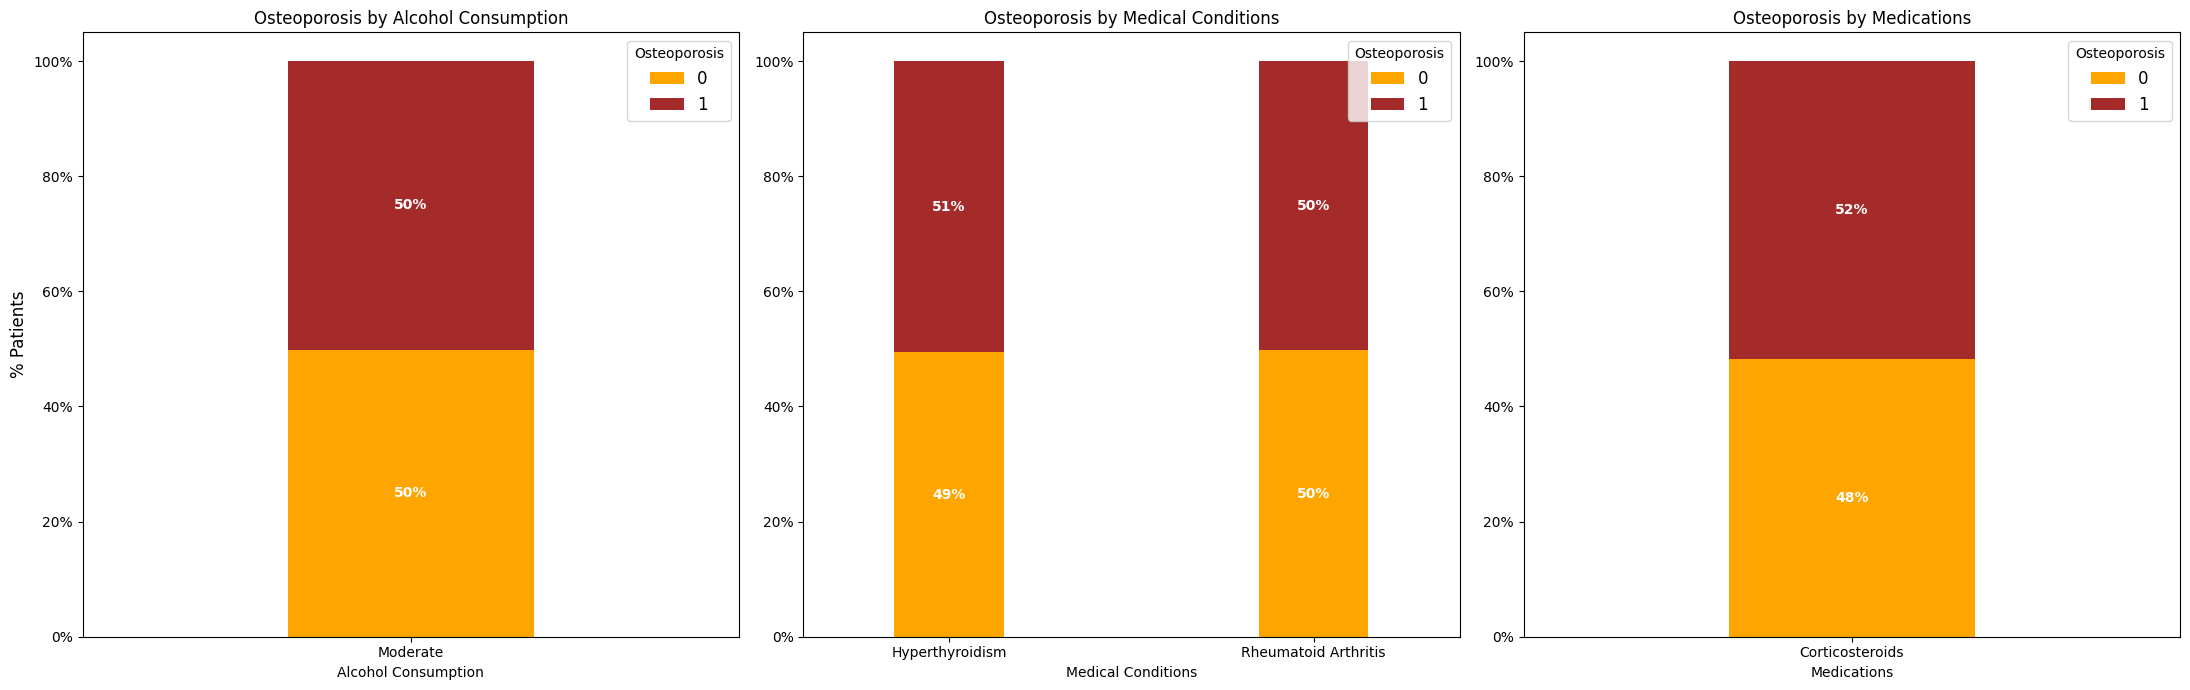

In [414]:
colors = ['orange', 'brown']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 7))

# ------------ Plot 1 : Osteoporosis by Alcohol Consumption ------------ #
Osteoporosis_by_AlcoholConsumption = data.groupby(['Alcohol Consumption', 'Osteoporosis']).size().unstack()

ax1 = (Osteoporosis_by_AlcoholConsumption.T * 100.0 / Osteoporosis_by_AlcoholConsumption.T.sum()).T.plot(
    kind='bar', width=0.3, stacked=True, rot=0, color=colors, ax=axes[0])

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.legend(loc='best', prop={'size': 12}, title='Osteoporosis')
ax1.set_ylabel('% Patients', size=12)
ax1.set_title('Osteoporosis by Alcohol Consumption', size=12)

for p in ax1.patches:
    height = p.get_height()
    if height > 0:
        ax1.annotate(f'{height:.0f}%',
                     (p.get_x() + 0.5 * p.get_width(), p.get_y() + 0.5 * height),
                     ha = 'center', va = 'center',
                     color = 'white', weight = 'bold', size = 10)


# ------------ Plot 2: Osteoporosis by Medical Conditions ------------ #
Osteoporosis_by_MedicalCondition = data.groupby(['Medical Conditions', 'Osteoporosis']).size().unstack()

ax2 = (Osteoporosis_by_MedicalCondition.T * 100.0 / Osteoporosis_by_MedicalCondition.T.sum()).T.plot(
    kind='bar', width=0.3, stacked=True, rot=0, color=colors, ax=axes[1])

ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(loc='best', prop={'size': 12}, title='Osteoporosis')
ax2.set_title('Osteoporosis by Medical Conditions', size=12)
ax2.legend(loc = 'upper right' , bbox_to_anchor = (1 , 1) , prop = {'size': 12} , title='Osteoporosis')
ax2.set_xticks([0, 1])  # Adjusts x-tick positions for fewer categories
ax2.set_xticklabels(["Hyperthyroidism", "Rheumatoid Arthritis"])

for p in ax2.patches:
    height = p.get_height()
    if height > 0:
        ax2.annotate(f'{height:.0f}%',
                     (p.get_x() + 0.5 * p.get_width(), p.get_y() + 0.5 * height),
                     ha = 'center', va = 'center',
                     color = 'white', weight = 'bold', size = 10)

# ------------ Plot 3: Osteoporosis by Medications ------------ #
Osteoporosis_by_Medications = data.groupby(['Medications', 'Osteoporosis']).size().unstack()

ax3 = (Osteoporosis_by_Medications.T * 100.0 / Osteoporosis_by_Medications.T.sum()).T.plot(
    kind='bar', width=0.3, stacked=True, rot=0, color=colors, ax=axes[2])

ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
ax3.legend(loc='best', prop={'size': 12}, title='Osteoporosis')
ax3.set_title('Osteoporosis by Medications', size=12)

for p in ax3.patches:
    height = p.get_height()
    if height > 0:
        ax3.annotate(f'{height:.0f}%',
                     (p.get_x() + 0.5 * p.get_width(), p.get_y() + 0.5 * height),
                     ha = 'center', va = 'center',
                     color = 'white', weight = 'bold', size = 10)

plt.tight_layout()
plt.show()

<h5> 8. Impact Of Nutritional Factors On Osteoporosis Risk

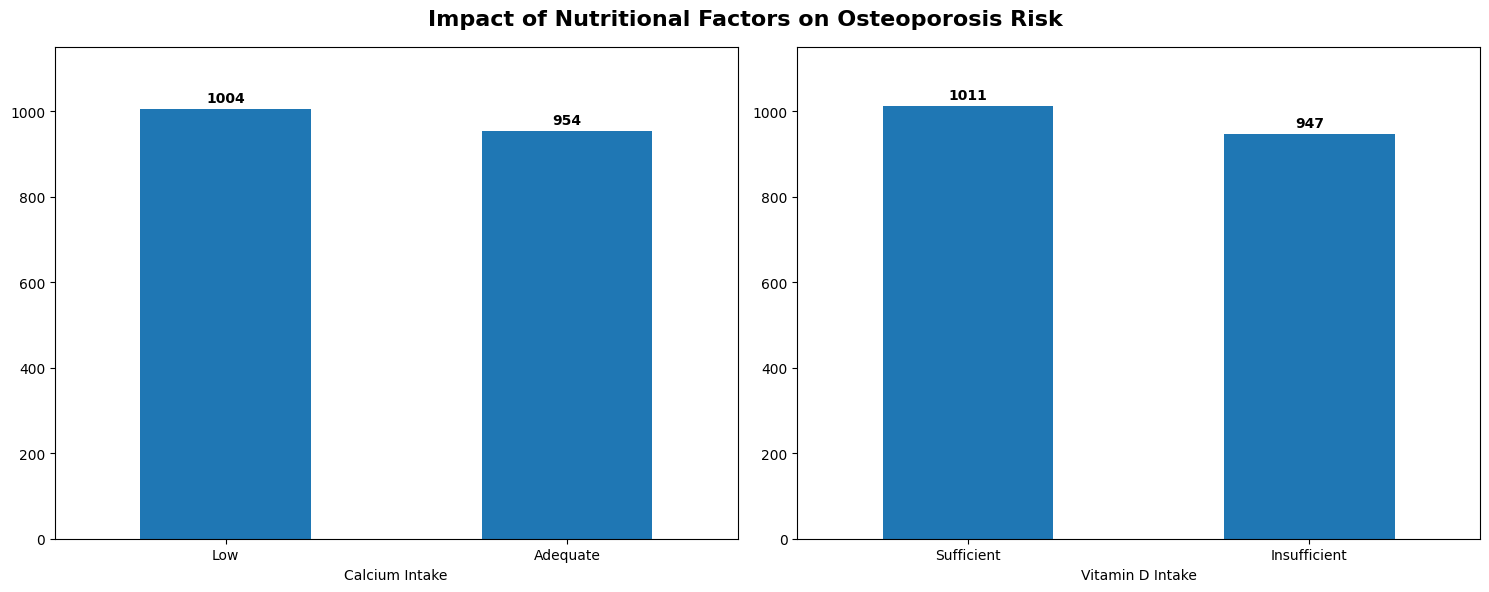

In [415]:
Nutritional_Factors = ['Calcium Intake', 'Vitamin D Intake']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

for i, item in enumerate(Nutritional_Factors):
    ax = axes[i]
    bar_plot = data[item].value_counts().plot(kind='bar', ax=ax, rot=0)

    ax.set_ylim(0 , 1150)

    for p in bar_plot.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height() + 10) ,
                    ha = 'center', va = 'bottom', fontsize=10, fontweight='bold')

fig.suptitle("Impact of Nutritional Factors on Osteoporosis Risk" , fontsize = 16 , fontweight='bold')
plt.tight_layout()
plt.show()

<h5> 9. Distribution of Body Weight and Physical Activity Levels

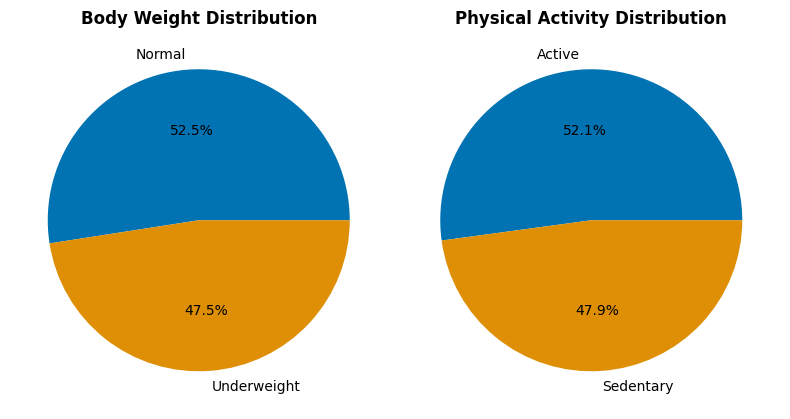

In [416]:
pie_colors = sns.color_palette("colorblind")
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

#----------------- Plot 1 : Body Weight Distribution --------------------#
body_weight_distribution = data['Body Weight'].value_counts(normalize=True)

axes[0].pie(body_weight_distribution, labels=body_weight_distribution.index, autopct='%1.1f%%', colors=pie_colors)
axes[0].set_title('Body Weight Distribution', fontweight = 'semibold')

#----------------- Plot 2 : Physical Activity Distribution --------------#
physical_activity_distribution = data['Physical Activity'].value_counts(normalize=True)

axes[1].pie(physical_activity_distribution, labels=physical_activity_distribution.index, autopct='%1.1f%%', colors=pie_colors)
axes[1].set_title('Physical Activity Distribution' , fontweight = 'semibold')


plt.tight_layout()
plt.show()

<h2> Data Preprocessing :

---



In [417]:
LB = LabelEncoder()
data['Family History'] = LB.fit_transform(data['Family History'])
data['Prior Fractures'] = LB.fit_transform(data['Prior Fractures'])
data['Gender'] = LB.fit_transform(data['Gender']) # Female as 0 and male as 1
data['Smoking'] = LB.fit_transform(data['Smoking'])

In [418]:
df_dummies = pd.get_dummies(data , columns = ['Hormonal Changes','Race/Ethnicity','Body Weight','Calcium Intake',
                                              'Vitamin D Intake','Physical Activity','Alcohol Consumption','Medical Conditions',
                                              'Medications'] ,dtype = 'int')

In [419]:
df_dummies.head()

,Age,Gender,Family History,Smoking,Prior Fractures,Osteoporosis,Hormonal Changes_Normal,Hormonal Changes_Postmenopausal,Race/Ethnicity_African American,Race/Ethnicity_Asian,...,Calcium Intake_Adequate,Calcium Intake_Low,Vitamin D Intake_Insufficient,Vitamin D Intake_Sufficient,Physical Activity_Active,Physical Activity_Sedentary,Alcohol Consumption_Moderate,Medical Conditions_Hyperthyroidism,Medical Conditions_Rheumatoid Arthritis,Medications_Corticosteroids
0,69,0,1,1,1,1,1,0,0,1,...,0,1,0,1,0,1,1,0,1,1
1,32,0,1,0,1,1,1,0,0,1,...,0,1,0,1,0,1,0,0,0,0
2,89,0,0,0,0,1,0,1,0,0,...,1,0,0,1,1,0,1,1,0,1
3,78,0,0,1,0,1,1,0,0,0,...,1,0,1,0,0,1,0,0,1,1
4,38,1,1,1,1,1,0,1,1,0,...,0,1,0,1,1,0,0,0,1,0


<h2> Feature Importance :

---



<Axes: >

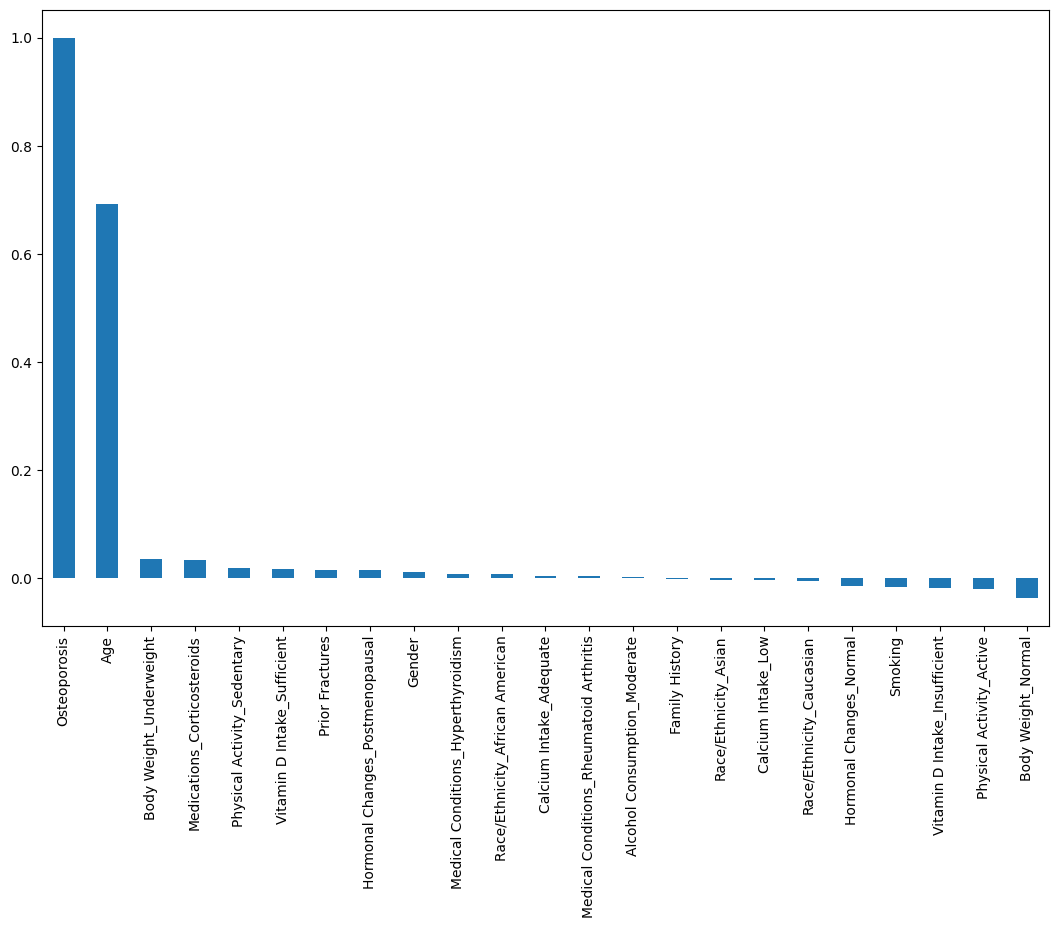

In [420]:
plt.figure(figsize = (13,8))
df_dummies.corr()['Osteoporosis'].sort_values(ascending = False).plot(kind = 'bar')

<h2> Machine Learning Model :

---



<h5> 1. Logistic Regression

In [421]:
x = df_dummies.drop(columns = 'Osteoporosis',axis = 1)
y = df_dummies['Osteoporosis']

In [422]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

In [423]:
sc =  StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [424]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [425]:
y_pred = model.predict(x_test)

In [426]:
print(accuracy_score(y_pred , y_test))

0.8545918367346939


In [427]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       197
           1       0.88      0.83      0.85       195

    accuracy                           0.85       392
   macro avg       0.86      0.85      0.85       392
weighted avg       0.86      0.85      0.85       392



<h5>2. SVM ( Support Vector Machine )

In [428]:
svm_class = svm.SVC(kernel = 'linear' , C = 1 )
svm_class.fit(x_train , y_train)

SVC(C=1, kernel='linear')

In [429]:
y_pred = svm_class.predict(x_test)

In [430]:
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       213
           1       0.82      0.89      0.86       179

    accuracy                           0.86       392
   macro avg       0.86      0.86      0.86       392
weighted avg       0.87      0.86      0.86       392



In [431]:
print(accuracy_score(y_pred , y_test))

0.8622448979591837


<h5> 3. Decision Tree Classifier

In [432]:
clf = DecisionTreeClassifier()

In [433]:
param_grid={
        'criterion':['gini','entropy'],
        'max_depth':[None , 10,20,30,40,50],
        'min_samples_split':[2,5,10],
        'min_samples_leaf':[1,2,4]
    }

In [434]:
grid_search = GridSearchCV(estimator = clf , param_grid = param_grid ,cv = 5 , scoring = 'accuracy',n_jobs = -1)

In [435]:
grid_search.fit(x_train ,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [436]:
best_params = grid_search.best_params_

In [437]:
best_clf  = DecisionTreeClassifier(**best_params)
best_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=50, min_samples_leaf=4,
                       min_samples_split=5)

In [438]:
y_pred = best_clf.predict(x_test)

In [439]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.85      0.68      0.75       197
           1       0.73      0.88      0.80       195

    accuracy                           0.78       392
   macro avg       0.79      0.78      0.78       392
weighted avg       0.79      0.78      0.78       392



In [440]:
print(accuracy_score(y_test , y_pred))

0.7780612244897959
